In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

import os
os.chdir("/content/drive/MyDrive//금융데이터 공모전")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("직장인예측 데이터.csv", encoding='cp949')

In [ ]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1:]

In [1]:
y

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection  import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train.to_numpy(),y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)


In [ ]:
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    200690
           1       0.88      0.75      0.81      7224

    accuracy                           0.99    207914
   macro avg       0.94      0.87      0.90    207914
weighted avg       0.99      0.99      0.99    207914



In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_clf = xgb.XGBClassifier()

# parameter 
xgb_param_grid = {'max_depth': [5,7,9,10], 
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.5,0.8,1]
              }

# Create a GridSearchCV object
hr_grid = GridSearchCV(estimator=xgb_clf,
                       param_grid=xgb_param_grid,
                       scoring='roc_auc',
                       n_jobs=-1,
                       cv=5,
                       refit=True, 
                       return_train_score=True)

In [ ]:
xgbc = XGBClassifier(max_depth=7, n_estimators=100, colsample_bytree=0.5, learning_rate=0.01,subsample=0.8,min_child_weight=1) ### colsample_bytee, subsample 1로 두면 오버 피팅되어서 여기서는 정확도는 올라가는데 실제 점수는 더 낮음
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(y_test, prediction_xgb))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9774377867772251


Text(0.5, 1.0, 'Feature importance')

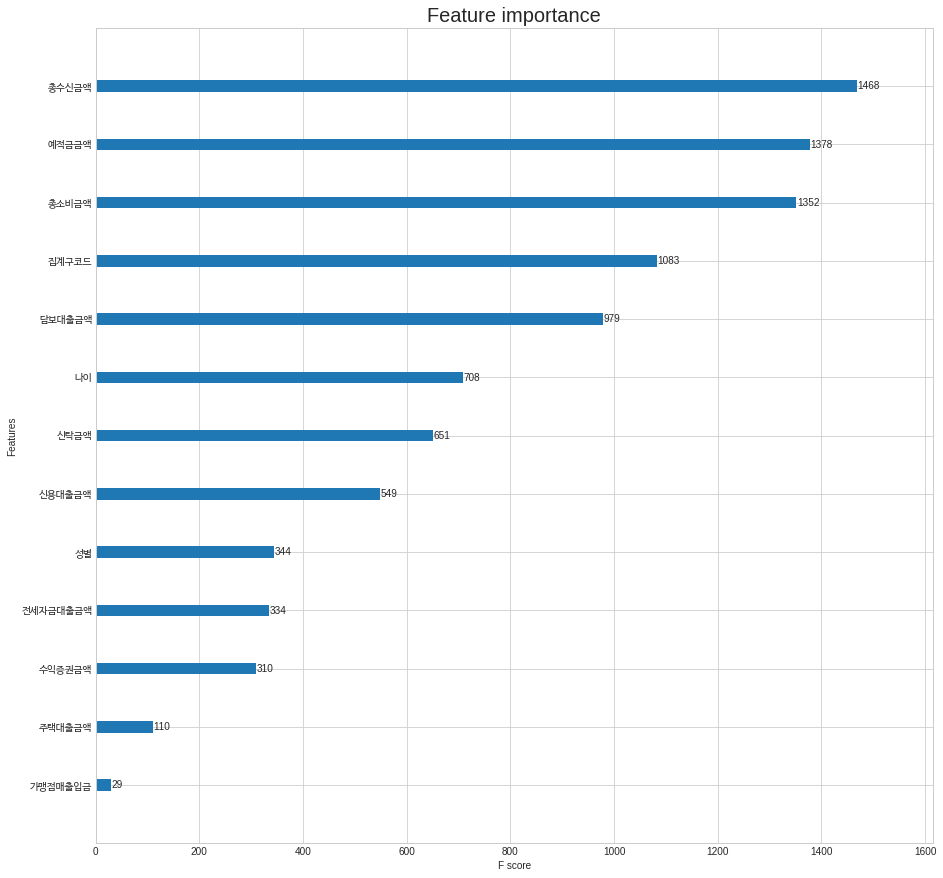

In [ ]:
import graphviz
import matplotlib.pyplot as plt
from xgboost import plot_importance
plt.style.use(['seaborn-whitegrid'])
fig,ax = plt.subplots(figsize=(15,15))
plot_importance(xgbc, ax=ax)
plt.yticks(fontproperties='NanumBarunGothic') 
plt.title('Feature importance',fontsize=20)

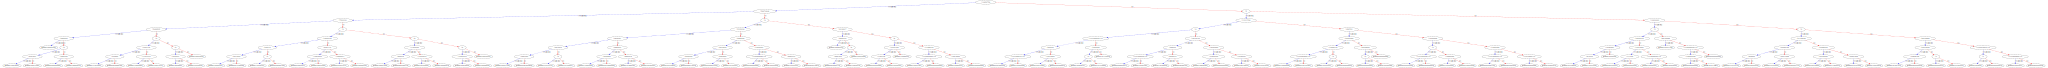

In [ ]:
##첫번째 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=0)
graph = graphviz.Source(dot_data)
graph